In [1]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [2]:
current_date_time = datetime.datetime.now()
formatted_date = current_date_time.strftime("%Y-%m-%d")

In [3]:
#Cripto Ativos : BTC-USD e ETH-USD
acao = 'BTC-USD'
df = yf.download(acao, start="2020-01-01", end=formatted_date)

[*********************100%***********************]  1 of 1 completed


---

### Preço do Fechamente ao longo do tempo

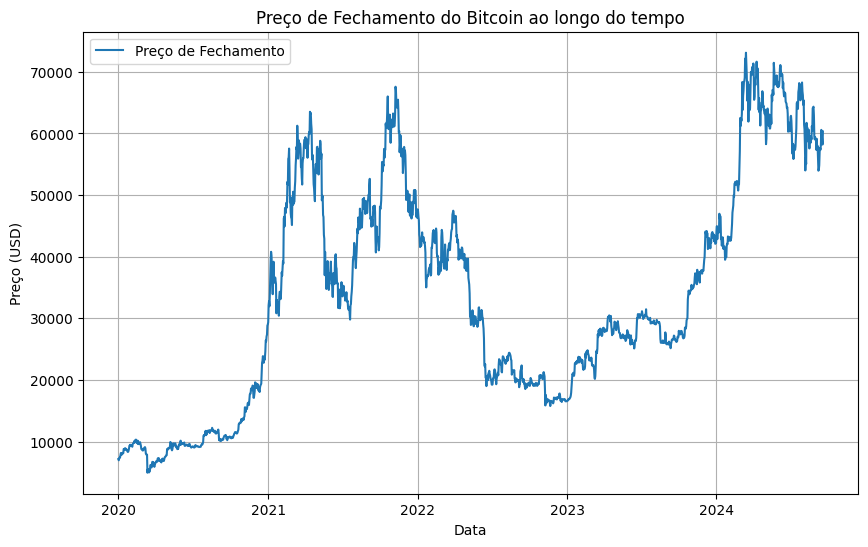

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Preço de Fechamento')
plt.title('Preço de Fechamento do Bitcoin ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

Fui brincando com essa questão de selecionar diferente recortes temporais para analisar o preço e a variação do mesmo nesses periodos e é muito interressante o fato de que é ua moeda bem instável, mas que de maneira geral apresenta uma tenência de crescimento de formos analisar, o que é um fato muito interessante.

---

### Matriz de confusão e Mapa de Calor

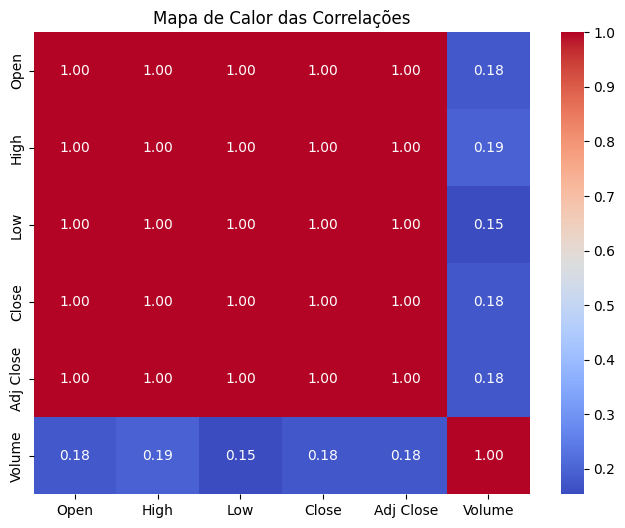

In [5]:
correlation_matrix = df.corr()

# Plotar o mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

A matriz de correlação foi bem interessante para entender como as features e os dados providos da bibliotéca estão ligados entre si e seu nível de correlação assim como o próprio nome diz, e com isso deu para tirar de conclusão que todos os dados tirando o Volume tem uma corelação fortissima entre si. Outro Insight legal de se obter.

---

### Média Móvel

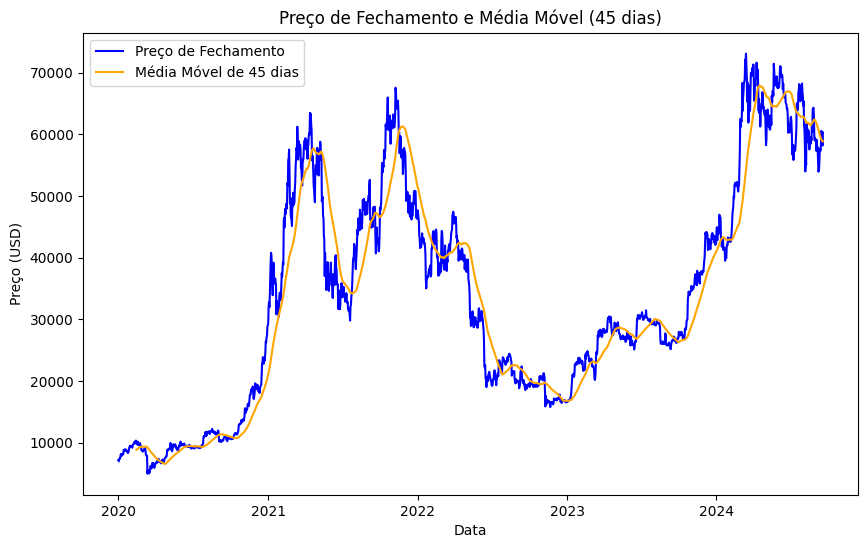

In [6]:
# Definir o período da média móvel (Ex: 14 dias)
window_size = 45

# Calcular a média móvel com base nos preços de fechamento
df['SMA_45'] = df['Close'].rolling(window=window_size).mean()

# Plotar os preços de fechamento e a média móvel
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Preço de Fechamento', color='blue')
plt.plot(df['SMA_45'], label=f'Média Móvel de {window_size} dias', color='orange')
plt.title(f'Preço de Fechamento e Média Móvel ({window_size} dias)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

Calculando e plotando a média móvel, foi muito interessante para entender se existe algum padrão que fica mais evidente fazendoe esse processo de normalização dos dados e é interessante ver que após uma queda tem uma grande subida e depois varia bastante para ter outra queda e o processo se repete, o que é bem interessante.

In [7]:
df.to_csv('../data/raw/BTC-USD.csv')